In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from data_processing import *
from report_processing import *


In [2]:
filename="6花环-交错花环4-8\\交错花环\\2481 R 外圈5-11.csv"
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

image_center=(30*point_per_mm,22*point_per_mm)
            # print(image_center)
ring_num=7

        
binary_image = detect_edge(data,threshold=1.0)
# Apply the function to the binary_image
microlenses, microlens_only_image = label_microlens(
    binary_image,
    min_area=15*15,
    )
microlens_params=microlens_centers_radius(microlenses)
sorted_microlens_params=cluster_rings(
        microlens_params,
        image_center=image_center,
        ring_num=ring_num,
        max_ring = 4,
        threshold=10)

c:\Users\goldengrape\miniconda3\envs\cv\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


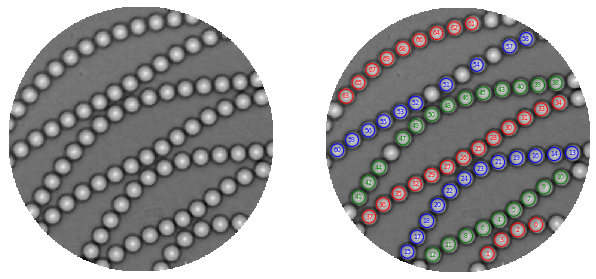

In [57]:
whole_pic_filename=f"{filename.split('.')[0]}_whole.png"
report_whole_picture(sorted_microlens_params, data,whole_pic_filename,dpi=75),
plt.show()

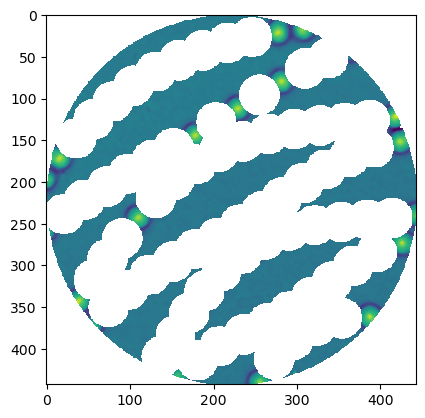

In [58]:
background=data.copy()
# fix_raidus=1*point_per_mm
fix_raidus=0.6*point_per_mm
for microlens in sorted_microlens_params:
    center=microlens['center']
    if fix_raidus is not None:
        radius=fix_raidus*1.5
    else:  
        radius=microlens['radius']*2
    # 在background中，把center为中心,radius为半径内的数据替换成np.nan
    
    # 创建一个表示半径的二维数组
    y, x = np.ogrid[-center[0]:background.shape[0]-center[0], -center[1]:background.shape[1]-center[1]]
    mask = x*x + y*y <= radius*radius

    # 使用这个数组来更新background
    background[mask] = np.nan
plt.imshow(background)
plt.show()

In [59]:
front=background.copy()
for microlens in sorted_microlens_params[4:5]:
    center = microlens['center']
    # radius = microlens['radius'] * 3
    if fix_raidus is not None:
        radius=fix_raidus*3
    else:  
        radius=microlens['radius']*4

    # 创建一个表示半径的二维数组
    y, x = np.ogrid[-center[0]:background.shape[0]-center[0], -center[1]:background.shape[1]-center[1]]
    mask = x*x + y*y <= radius*radius

    # 创建一个新的掩码，表示background中哪些值不是np.nan
    not_nan_mask = ~np.isnan(background)

    # 将新的掩码和原来的mask进行逻辑与操作
    final_mask = mask & not_nan_mask

    # 使用这个结果来计算中位数，用中位数比较稳定
    if np.any(final_mask):
        microlens['Rx'] = np.nanmedian(background[final_mask])
        # print(microlens['Rx'])
        # microlens['Rx'] = np.nanmean(background[final_mask])
        
        front[final_mask] = 10
    else:
        microlens['Rx'] = np.nan

1420


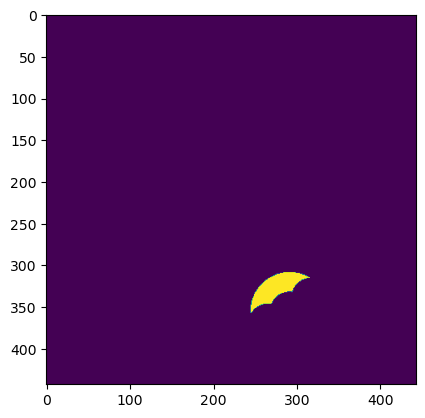

-2.74111


In [60]:
plt.imshow(final_mask)
print(len(final_mask[final_mask==True]))
plt.show()
print(microlens['Rx'])

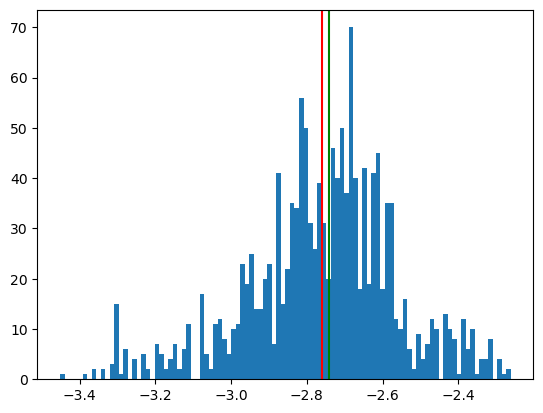

-2.7592399133802816
-2.74111


In [61]:
# background[final_mask]的hist
plt.hist(background[final_mask].flatten(),bins=100)
# 画出平均数，中位数、众数的位置
plt.axvline(np.nanmean(background[final_mask]),color='red')
plt.axvline(np.nanmedian(background[final_mask]),color='green')
plt.show()
print(np.nanmean(background[final_mask]))
print(np.nanmedian(background[final_mask]))

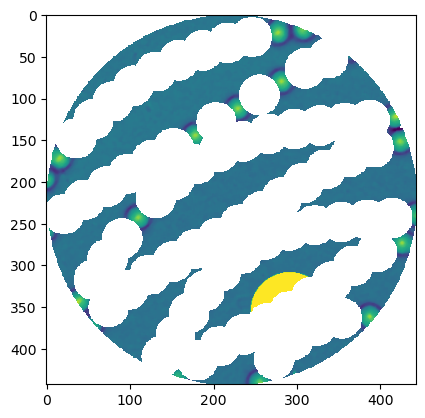

In [62]:
plt.imshow(front)
plt.show()

In [63]:
# sorted_microlens_params=calculate_each_lens_Rx(data,sorted_microlens_params)
sorted_microlens_params=calculate_each_lens_Rx(data,sorted_microlens_params, fix_raidus=1*point_per_mm)

In [64]:
sorted_microlens_params[2:6]

[{'center': (372.8541564941406, 323.2916564941406),
  'radius': 11.470276832580566,
  'ring': 0,
  'Rx': -2.754699},
 {'center': (389.3396301269531, 295.7452697753906),
  'radius': 10.99714183807373,
  'ring': 0,
  'Rx': -2.735162},
 {'center': (355.3355407714844, 291.22369384765625),
  'radius': 11.02001667022705,
  'ring': 1,
  'Rx': -2.744005},
 {'center': (338.7903137207031, 316.7903137207031),
  'radius': 11.107688903808594,
  'ring': 1,
  'Rx': -2.753327}]

In [65]:
sorted_microlens_params[23:26]

[{'center': (270.0666809082031, 261.0666809082031),
  'radius': 10.724300384521484,
  'ring': 2,
  'Rx': -2.698814},
 {'center': (286.8066711425781, 233.96665954589844),
  'radius': 10.996394157409668,
  'ring': 2,
  'Rx': -2.698592},
 {'center': (236.0, 257.5),
  'radius': 10.965956687927246,
  'ring': 3,
  'Rx': -2.691706}]

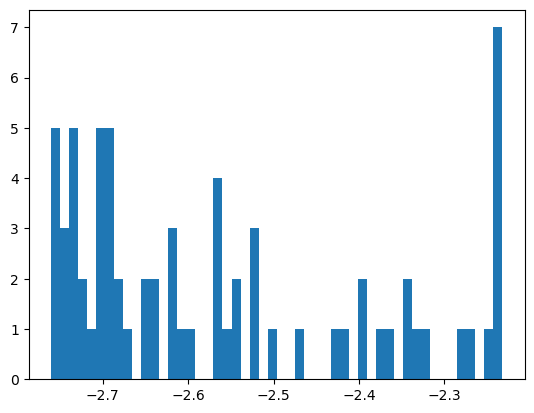

In [66]:
# 取出sorted_microlens_params中所有的Rx
Rx_list=[]
for i in range(len(sorted_microlens_params)):
    Rx_list.append(sorted_microlens_params[i]['Rx'])
# 计算Rx的hist，并绘图
Rx_hist = np.histogram(Rx_list,bins=50)
plt.hist(Rx_list,bins=50)
plt.show()


In [67]:
print(sorted_microlens_params[4])
print(Rx_list[4])
# print(sorted_microlens_params[68])
print(Rx_list[68])


{'center': (355.3355407714844, 291.22369384765625), 'radius': 11.02001667022705, 'ring': 1, 'Rx': -2.744005}
-2.744005
-2.241621
